In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

import time
import copy
!pip install missingno
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,recall_score, precision_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV

In [ ]:
data_path = "/content/drive/MyDrive/Colab Notebooks/AI India/data/Sample_points.csv"
data = pd.read_csv(data_path)
df = data.copy()

# Exploratory Data Analysis - EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2402 entries, 0 to 2401
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    2402 non-null   int64  
 1   Id          2402 non-null   int64  
 2   Class_name  2402 non-null   object 
 3   ORIG_FID    2402 non-null   int64  
 4   POINT_X     2402 non-null   float64
 5   POINT_Y     2402 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 112.7+ KB


In [ ]:
df.head(20) # 

,OBJECTID,Id,Class_name,ORIG_FID,POINT_X,POINT_Y
0,1,0,Agriculture,0,599348.6366,2207930.196
1,2,0,Agriculture,1,599328.2133,2208075.224
2,3,0,Agriculture,2,598949.2685,2208382.371
3,4,0,Agriculture,3,597708.0247,2209058.754
4,5,0,Agriculture,4,597431.0999,2208983.332
5,6,0,Agriculture,5,413079.4917,1827857.053
6,7,0,Agriculture,6,413099.1775,1827809.542
7,8,0,Agriculture,7,413154.6965,1827791.957
8,9,0,Agriculture,8,413075.4198,1827233.128
9,10,0,Agriculture,9,415125.7290,1825608.705


In [ ]:
df.drop(columns="OBJECTID", axis = 1, inplace= True)
df.drop(columns="ORIG_FID", axis = 1, inplace= True)
df.drop(columns="Id", axis = 1, inplace= True)

df.loc[df['Class_name']=='Agriculture', 'Class_name'] = 1
df.loc[df['Class_name']=='Barren_land', 'Class_name'] = 2
df.loc[df['Class_name']=='Builtup', 'Class_name'] = 3
df.loc[df['Class_name']=='Danse_Forest', 'Class_name'] = 4
df.loc[df['Class_name']=='Fallow_land', 'Class_name'] = 5
df.loc[df['Class_name']=='Sparse_forest', 'Class_name'] = 6
df.loc[df['Class_name']=='Waterbody', 'Class_name'] = 7

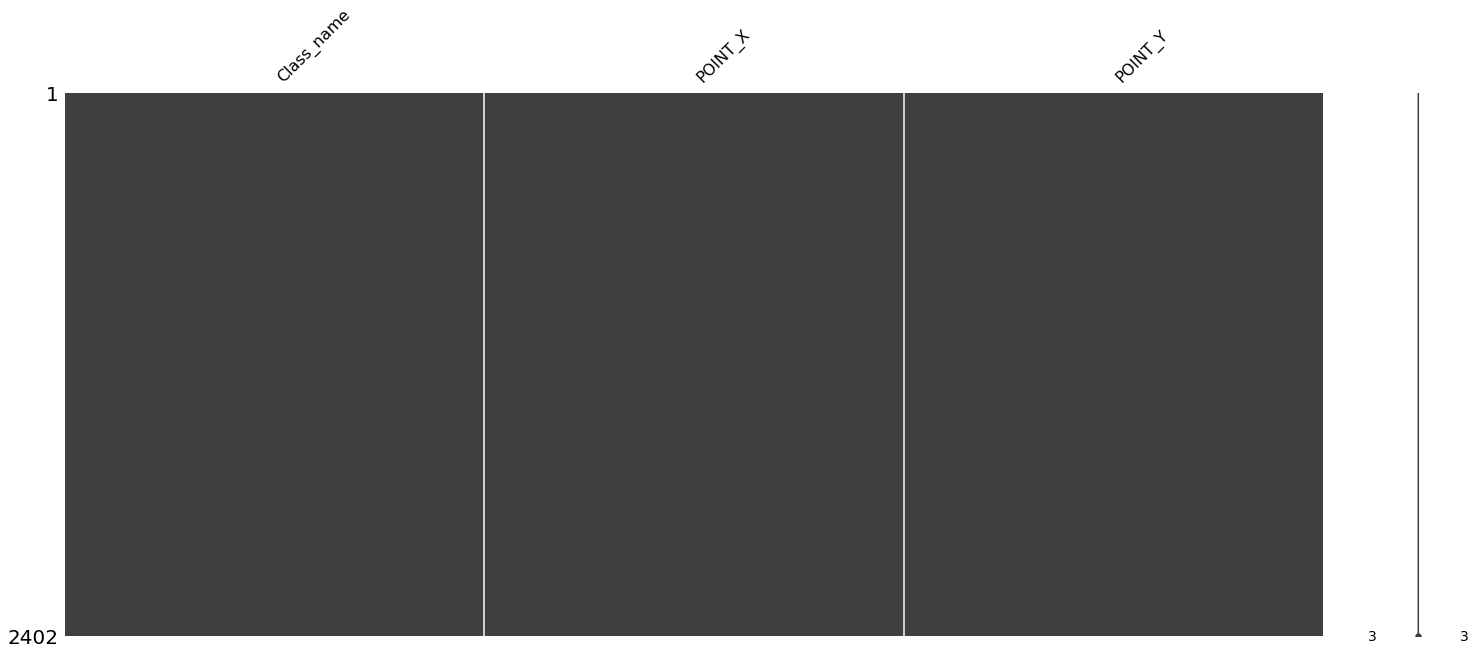

In [ ]:
msno.matrix(msno.nullity_sort(df, sort='descending'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


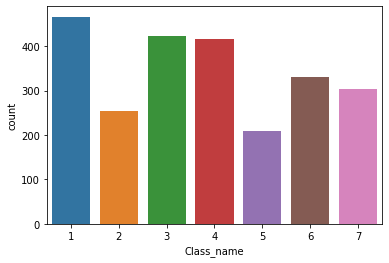

In [ ]:
sns.countplot(df['Class_name'])

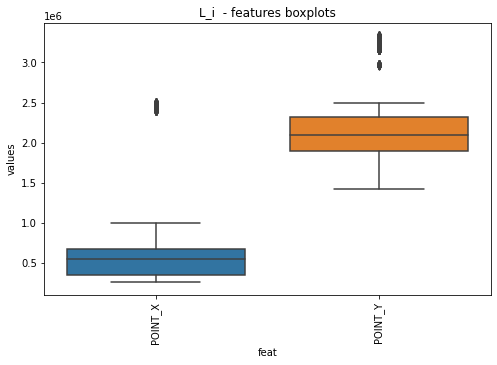

In [ ]:
plt.figure( figsize=(8, 5))
plt.title("L_i  - features boxplots")
sns.set_style("white")
bx_plot = sns.boxplot(data=df[["POINT_X", "POINT_Y"]]) #there are 65 diff cols
plt.xticks(rotation=90)
plt.xlabel("feat")
plt.ylabel("values")
plt.show()

In [ ]:
df

,Class_name,POINT_X,POINT_Y
0,1,599348.6366,2207930.196
1,1,599328.2133,2208075.224
2,1,598949.2685,2208382.371
3,1,597708.0247,2209058.754
4,1,597431.0999,2208983.332
...,...,...,...
2397,4,903719.5296,1653655.582
2398,4,904177.9597,1651411.815
2399,4,904183.6167,1650335.302
2400,4,904290.3335,1649776.499


In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
print(df.shape)
print(X.shape)
print(y.shape)

(2402, 3)
(2402, 2)
(2402,)


In [ ]:
X.corr().round(decimals=3)

,POINT_X,POINT_Y
POINT_X,1.000,0.691
POINT_Y,0.691,1.000


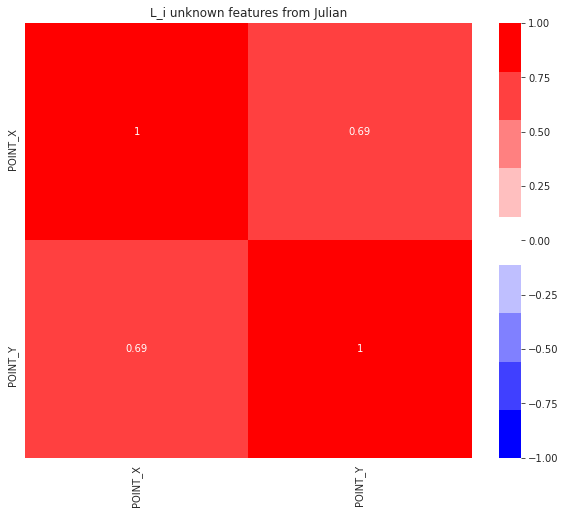

In [ ]:
n_colors = 9
cMap = plt.cm.get_cmap("bwr", lut = n_colors)
plt.figure( figsize=(10, 8))
plt.title("L_i unknown features")
h_map = sns.heatmap(X.corr().values, vmin = -1., vmax = 1., cmap = cMap, annot = True, xticklabels = list(X), yticklabels = list(X))
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby("Class_name").count()

,POINT_X,POINT_Y
Class_name,,
1,466,466
2,254,254
3,423,423
4,415,415
5,210,210
6,331,331
7,303,303


In [ ]:
y=y.astype('int') 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2397    4
2398    4
2399    4
2400    4
2401    4
Name: Class_name, Length: 2402, dtype: int64

#KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#define the model and parameters
knn = KNeighborsClassifier()

k_p = list(range(1,200))
parameters = {'n_neighbors':k_p}

#Fit the model
model = GridSearchCV(knn, param_grid=parameters, scoring='accuracy', verbose=2)
model.fit(X_train,y_train)

# Plot the test scores that correspond to each number of neighbors
KNN_search = pd.DataFrame.from_dict(model.cv_results_)
mean_test_score = KNN_search[["mean_test_score"]].sort_values(by="mean_test_score", ascending=False)
# 
params = KNN_search[["params"]]
#  
index = 0 
for i in  KNN_search.head(5).index.tolist():
        index += 1
        print(index," : ", mean_test_score.iloc[i]* 100, params.iloc[i,0])

plt.title("cv_scores")
plt.xlabel('n_neighbors')
plt.ylabel('cv acc')

plt.xticks(range(len(k_p)), k_p, rotation=45)
_ = plt.plot(KNN_search['mean_test_score'].head(5), '*')
plt.show()

score on testing set_:  0.9722572509457755
accuracy= 97.23%
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
----------------

Confusion matrix, without normalization
[[165   0   0   0   0   0   0]
 [  0  86   0   1   0   0   2]
 [  0   1 132   0   0   1   0]
 [  0   0   0 129   0   4   0]
 [  0   0   0   0  62   0   0]
 [  0   1   0   2   0 105   1]
 [  1   0   4   0   4   0  92]]


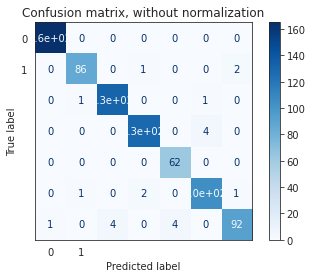

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import numpy as np

np.set_printoptions(precision=2)

# Accuracy

score = model.score(X_test, y_test)
print("score on testing set_: ",score)
print("accuracy= %.2f%%" % (score * 100))
print(model.best_estimator_)
print("----------------\n")
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None)]
class_names = [0,1]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
knn_classifier = Pipeline(steps=[('std_sc', StandardScaler()),
                                  ('knn', KNeighborsClassifier(weights='distance'))])
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

acc    = accuracy_score(y_test, y_pred) 


print("acc: %.3f" % (acc))

print("\nconfusion matrix:\n", confusion_matrix(y_test, y_pred))

acc: 0.960

confusion matrix:
 [[165   0   0   0   0   0   0]
 [  0  86   0   1   0   2   0]
 [  0   1 132   0   0   1   0]
 [  0   0   1 128   0   4   0]
 [  1   0   1   0  60   0   0]
 [  0   1   1   2   0 103   2]
 [  2   0   8   0   4   0  87]]


Tuned KNN using `leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'`

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 1,leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, p=2,
                     weights='uniform')

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[165   0   0   0   0   0   0]
 [  0  86   0   1   0   0   2]
 [  0   1 132   0   0   1   0]
 [  0   0   0 129   0   4   0]
 [  0   0   0   0  62   0   0]
 [  0   1   0   2   0 105   1]
 [  1   0   4   0   4   0  92]]
Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       165
           2       0.98      0.97      0.97        89
           3       0.97      0.99      0.98       134
           4       0.98      0.97      0.97       133
           5       0.94      1.00      0.97        62
           6       0.95      0.96      0.96       109
           7       0.97      0.91      0.94       101

    accuracy                           0.97       793
   macro avg       0.97      0.97      0.97       793
weighted avg       0.97      0.97      0.97       793

Accuracy: 0.9722572509457755


In [ ]:
pred_prob = classifier.predict_proba(X_test)
pred_prob.shape
pred_prob

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
print('Predicted labels: ', y_pred[1:15])
print('Actual labels   : ' ,y_test[1:15])

Predicted labels:  [1 3 3 5 4 1 6 7 1 4 4 3 5 6]
Actual labels   :  111     1
1512    7
1651    3
741     5
2039    4
237     1
952     6
1532    7
450     1
2072    4
618     2
1652    3
862     5
1249    6
Name: Class_name, dtype: int64


In [ ]:
# we use stratified folds
n_folds = 10
skf = StratifiedKFold(n_folds, 
                      shuffle=True)

l_k = [1 + 2**k for k in range(1, 10)]
param_grid = {'knn__n_neighbors': l_k}

knn_gscv = GridSearchCV(knn_classifier, 
                        param_grid=param_grid, 
                        cv=skf, 
                        scoring='accuracy', 
                        return_train_score=True, 
                        n_jobs=-1, 
                        verbose=1)

print("GridSearch over a list of neighbors: {0}".format(l_k))
_ = knn_gscv.fit(X_train, y_train)



GridSearch over a list of neighbors: [3, 5, 9, 17, 33, 65, 129, 257, 513]
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.0s finished


,param_knn__n_neighbors,mean_test_score
0,3,0.970776
1,5,0.964565
2,9,0.955233
3,17,0.949002
4,33,0.939689


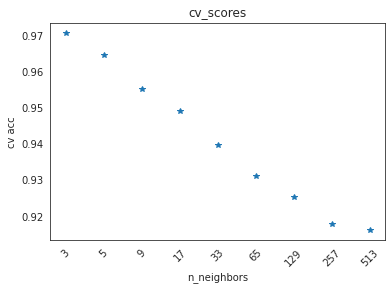

In [ ]:
df_nn_k_search = pd.DataFrame.from_dict(knn_gscv.cv_results_)

display(df_nn_k_search[["param_knn__n_neighbors", "mean_test_score"]].sort_values(by="mean_test_score", ascending=False).head())
plt.title("cv_scores")
plt.xlabel('n_neighbors')
plt.ylabel('cv acc')
plt.xticks(range(len(l_k)), l_k, rotation=45)
_ = plt.plot( df_nn_k_search['mean_test_score'], '*')
plt.show()



In [ ]:
best_k = knn_gscv.best_params_['knn__n_neighbors']

print("best_k: {0:d}".format(best_k))

y_pred = knn_gscv.predict(X_test)

acc    = accuracy_score(y_test, y_pred)

print("acc: %.3f" % (acc))

print("\nconfusion matrix:\n", confusion_matrix(y_test, y_pred))


best_k: 3
acc: 0.965

confusion matrix:
 [[165   0   0   0   0   0   0]
 [  0  86   0   1   0   2   0]
 [  0   1 132   0   0   1   0]
 [  0   0   0 128   0   5   0]
 [  1   0   1   0  60   0   0]
 [  0   1   1   2   0 104   1]
 [  1   0   6   0   4   0  90]]


# MLP

In [ ]:

from sklearn.neural_network import MLPClassifier
#define an appropriate MLP classifier and perform CV to select proper alpha and hidden_layer_sizes
n_folds = 10
skf = StratifiedKFold(n_folds, shuffle=True)

mlp_classifier = Pipeline(steps=[('std_sc', StandardScaler()),
                                 ('mlpc', MLPClassifier(solver='adam', 
                                              activation='relu',
                                              tol=1.e-4, 
                                              max_iter=1000,
                                              warm_start=False,
                                              shuffle=True))])

l_hidden_layer_sizes = [(20,), (20, 20)]
l_alpha = [10.**k for k in range(-6, 4)]

param_grid = {'mlpc__alpha': l_alpha, 'mlpc__hidden_layer_sizes': l_hidden_layer_sizes}

mlpc_gscv = GridSearchCV(mlp_classifier, param_grid=param_grid, cv=skf, scoring='accuracy',
                         return_train_score=True, n_jobs=-1, verbose=1)

t_0 = time.time() 
_ = mlpc_gscv.fit(X_train,y_train)
t_1 = time.time() 
print("\nmlp_grid_search_time: {0:.2}f".format((t_1 - t_0)/60.))

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  7.5min finished



mlp_grid_search_time: 7.6f


In [ ]:
#transfor the CV results into a DataFrame and display the 5 best results
df_cv_estimator = pd.DataFrame.from_dict(mlpc_gscv.cv_results_)

display(df_cv_estimator[["param_mlpc__alpha", "param_mlpc__hidden_layer_sizes", "mean_test_score"]].sort_values(by="mean_test_score", ascending=False).head(5))

,param_mlpc__alpha,param_mlpc__hidden_layer_sizes,mean_test_score
5,0.0001,"(20, 20)",0.681770
9,0.01,"(20, 20)",0.671231
7,0.001,"(20, 20)",0.669992
3,1e-05,"(20, 20)",0.669325
1,1e-06,"(20, 20)",0.663191


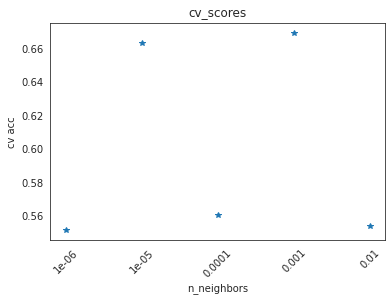

In [ ]:
#plot the test scores that correspond to each alpha; do this only for the best MLP architecture found
plt.title("cv_scores")
plt.xlabel('n_neighbors')
plt.ylabel('cv acc')
plt.xticks(range(len(l_alpha)), l_alpha, rotation=45)
_ = plt.plot(df_cv_estimator['mean_test_score'].head(5), '*')
plt.show()

best alpha: 0.000100	
alpha_min: 0.000001	alpha_max: 1000.000000
best_hidden_layer_sizes (20, 20) 
acc: 0.682


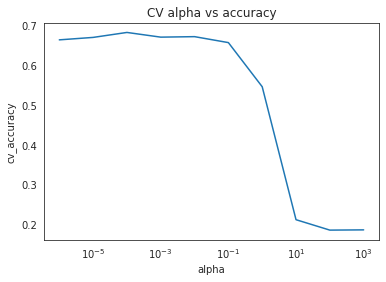

In [ ]:
best_alpha = mlpc_gscv.best_params_['mlpc__alpha'] 
print("best alpha: %.6f\t" % best_alpha)
print("alpha_min: %f\talpha_max: %f" % (np.array(l_alpha).min(), np.array(l_alpha).max()))

best_hidden_layer_sizes = mlpc_gscv.best_params_['mlpc__hidden_layer_sizes'] 
print("best_hidden_layer_sizes", best_hidden_layer_sizes, "\nacc: %.3f" % mlpc_gscv.best_score_) 

idx_best_hidden_layer_sizes = [tup == best_hidden_layer_sizes for tup in df_cv_estimator['param_mlpc__hidden_layer_sizes'].values]
idx_best_hidden_layer_sizes = np.array(idx_best_hidden_layer_sizes)

plt.title("CV alpha vs accuracy")
plt.xscale('log')
plt.xlabel("alpha")
plt.ylabel("cv_accuracy")
_ = plt.plot( df_cv_estimator[idx_best_hidden_layer_sizes]['param_mlpc__alpha'], 
              df_cv_estimator[idx_best_hidden_layer_sizes]['mean_test_score'])

# XGBoost 


In [ ]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
print('> Training XGBoost classifier...')
params={
            'reg_alpha': 23, 
            'max_depth': 6, 
            'learning_rate': 0.1, 
            'gamma': 1.0,
            'n_estimators':1000,
            'min_child_weight':1,
            'subsample':0.8,
            'colsample_bytree':0.8,
            'objective': 'binary:logistic',
            'nthread':4,
            'scale_pos_weight':1,
            'seed':27
        }
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

xg_reg = XGBClassifier(random_state=0, booster='gbtree', **params)

> Training XGBoost classifier...


In [ ]:
xg_reg.fit(X_train,y_train)
y_preds = xg_reg.predict(X_test)


acc    = accuracy_score(y_test, y_pred) 

print("acc: %.3f" % (acc))

print("\nconfusion matrix:\n", confusion_matrix(y_test, y_pred))

acc: 0.965

confusion matrix:
 [[165   0   0   0   0   0   0]
 [  0  86   0   1   0   2   0]
 [  0   1 132   0   0   1   0]
 [  0   0   0 128   0   5   0]
 [  1   0   1   0  60   0   0]
 [  0   1   1   2   0 104   1]
 [  1   0   6   0   4   0  90]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params_grid = {  
    'learning_rate': [0.01,0.001, 0.02, 0.03, 0.04, 0.05],
    'max_depth': [5,6,7,8,9,10,11,12],
    'gamma': [0.1,0.001, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0],
    'reg_alpha': [20, 21, 22, 23, 24, 25],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['sigmoid']}
  
search_sk = GridSearchCV(xg_reg,params_grid,verbose=2)

#search_sk = RandomizedSearchCV(xgb_model, params_grid, cv = 5) # 5 fold cross validation
search_sk.fit(X_train, y_train)

# best parameters
print(search_sk.best_params_)
print(search_sk.best_score_)


Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
[CV] gamma=0.1, kernel=rbf, learning_rate=0.01, max_depth=5, reg_alpha=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gamma=0.1, kernel=rbf, learning_rate=0.01, max_depth=5, reg_alpha=20, total=   3.7s
[CV] gamma=0.1, kernel=rbf, learning_rate=0.01, max_depth=5, reg_alpha=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


Se han truncado las últimas 5000 líneas del flujo de salida.
[CV]  gamma=0.1, kernel=rbf, learning_rate=0.001, max_depth=8, reg_alpha=22, total=   3.8s
[CV] gamma=0.1, kernel=rbf, learning_rate=0.001, max_depth=8, reg_alpha=22 
[CV]  gamma=0.1, kernel=rbf, learning_rate=0.001, max_depth=8, reg_alpha=22, total=   3.8s
[CV] gamma=0.1, kernel=rbf, learning_rate=0.001, max_depth=8, reg_alpha=22 
[CV]  gamma=0.1, kernel=rbf, learning_rate=0.001, max_depth=8, reg_alpha=22, total=   3.9s
[CV] gamma=0.1, kernel=rbf, learning_rate=0.001, max_depth=8, reg_alpha=22 
[CV]  gamma=0.1, kernel=rbf, learning_rate=0.001, max_depth=8, reg_alpha=22, total=   3.9s
[CV] gamma=0.1, kernel=rbf, learning_rate=0.001, max_depth=8, reg_alpha=22 
[CV]  gamma=0.1, kernel=rbf, learning_rate=0.001, max_depth=8, reg_alpha=22, total=   3.9s
[CV] gamma=0.1, kernel=rbf, learning_rate=0.001, max_depth=8, reg_alpha=23 
[CV]  gamma=0.1, kernel=rbf, learning_rate=0.001, max_depth=8, reg_alpha=23, total=   3.7s
[CV] gamma=0.

In [ ]:
#xgb_model_new = XGBClassifier(random_state=0, booster='gbtree', **search_sk.best_params_)
xgb_model_new = XGBClassifier(max_depth=5, 
                              reg_alpha = 20,
                              learning_rate = 0.05,
                              gamma = 0.1,
                              kernel = 'rbf'                          
                              )
xgb_model_new.fit(X_train, y_train)
y_pred = xgb_model_new.predict(X_test)


print('Accuracy: ', accuracy_score(y_test, y_pred))
print("AUC: ", roc_auc_score(y_test, y_pred))



# [Catboost](https://catboost.ai/docs/concepts/python-usages-examples.html)

In [ ]:
!pip install catboost
from catboost import Pool, CatBoostClassifier


eval_dataset = Pool(X_test,
                    y_test)

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=10,
                           learning_rate=1,                           
                           max_depth=3,
                           loss_function='MultiClass')
# Fit model
model.fit(X_train,y_train)
# Get predicted classes
preds_class = model.predict(X_test)
# Get predicted probabilities for each class

print(model.get_best_score())

print('Accuracy: ', accuracy_score(y_test, preds_class))


In [ ]:
# Tuning
grid = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}

cbc = CatBoostClassifier()

#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ='accuracy', cv = 5)

#fit the model
gscv.fit(X_train,y_train)

In [ ]:
#returns the estimator with the best performance
print(gscv.best_estimator_)

#returns the best score
print(gscv.best_score_)

#returns the best parameters
print(gscv.best_params_)

In [ ]:

# Initialize CatBoostClassifier
model = CatBoostClassifier(max_depth= 5, 
                           n_estimators= 300,
                           loss_function='MultiClass')
# Fit model
model.fit(X_train,y_train)
# Get predicted classes
preds_class = model.predict(X_test)
# Get predicted probabilities for each class

print(model.get_best_score())

print('Accuracy: ', accuracy_score(y_test, preds_class))


## Tunning catboost with RandomizedSearchCV 

In [ ]:
# RandomizedSearchCV - https://medium.com/aiplusoau/hyperparameter-tuning-a5fe69d2a6c7 

from scipy.stats import randint

#Instantiate CatBoostClassifier
cbc = CatBoostClassifier()

# Creating the hyperparameter grid
param_dist = {"learning_rate": np.linspace(0,0.2,5),
              
               "max_depth": randint(3, 10)}
               
#Instantiate RandomSearchCV object
rscv = RandomizedSearchCV(cbc , param_dist, scoring='accuracy', cv =5)

#Fit the model
rscv.fit(X_train,y_train)

# Print the tuned parameters and score
print(rscv.best_params_)
print(rscv.best_score_)

In [ ]:

# Initialize CatBoostClassifier
model = CatBoostClassifier(
                           learning_rate = 0.2,
                           max_depth= 9, 
                           loss_function='MultiClass')
# Fit model

model.fit(X_train,y_train)
# Get predicted classes
preds_class = model.predict(X_test)
# Get predicted probabilities for each class

print(model.get_best_score())

print('Accuracy: ', accuracy_score(y_test, preds_class))

# [LightGBM](https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html)


In [ ]:
from lightgbm import LGBMClassifier

params = {'boosting_type': 'gbdt',
                                            'objective': 'multiclass',
                                            'metric': 'multi_logloss',
                                            'num_class':5,
                                            'max_depth':8,
                                            'num_leaves':200,
                                            'learning_rate': 0.05,
                                            'n_estimators':500}
clf = LGBMClassifier(**params)

clf.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=10)

In [ ]:
params = {
    
'boosting_type': 'gbdt',
'objective': 'multiclass',
'metric': 'multi_logloss',
'num_class':5,
'max_depth':8,
'num_leaves':200,
'learning_rate': 0.05,
'n_estimators':500,
'min_data_in_leaf':200,
'colsample_bytree': 1.0,
'subsample': 1.0,
'subsample_freq':0,
'reg_alpha': 0.0,
'reg_lambda':0.0,
'max_bin': 10,
'min_child_samples':20,
'min_child_weight':5,
'min_split_gain':0.0,
'n_jobs':-1,
'random_state':None,
'silent':True,
'subsample_for_bin':2000000

}

In [ ]:
clf = LGBMClassifier(**params)

clf.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=10)

In [ ]:
preds_class = clf.predict(X_test)
# Get predicted probabilities for each class

print('Accuracy: ', accuracy_score(y_test, preds_class))